In [94]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [95]:
#importing traffic collisions dataset from DataLA (https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/about_data
#                                                  https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data)
df1 = pd.read_csv('/Users/vinitbhanushali/Desktop/Projects/LA_Crime /Crime_Data_from_2010_to_2019_20240504.csv')
df2 = pd.read_csv('/Users/vinitbhanushali/Desktop/Projects/LA_Crime /Crime_Data_from_2020_to_Present_20240504.csv')

df1.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
5,100100506,01/05/2010 12:00:00 AM,01/04/2010 12:00:00 AM,1650,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,01/08/2010 12:00:00 AM,01/07/2010 12:00:00 AM,2005,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
7,100100509,01/09/2010 12:00:00 AM,01/08/2010 12:00:00 AM,2100,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,AA,Adult Arrest,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427
8,100100510,01/09/2010 12:00:00 AM,01/09/2010 12:00:00 AM,230,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640
9,100100511,01/09/2010 12:00:00 AM,01/06/2010 12:00:00 AM,2100,1,Central,132,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,200 S OLIVE ST,NaN,34.0538,-118.2488


In [96]:
#comparing column names to ensure proper concatenation of the two datasets
columns_df1 = set(df1.columns)
columns_df2 = set(df2.columns)

common_columns = columns_df1.intersection(columns_df2)
unique_columns_df1 = columns_df1.difference(columns_df2)
unique_columns_df2 = columns_df2.difference(columns_df1)

#printing common and unique columns
print("Common columns:", common_columns)
print("\nColumns unique to df1:", unique_columns_df1)
print("Columns unique to df2:", unique_columns_df2)

Common columns: {'LOCATION', 'AREA NAME', 'Weapon Used Cd', 'Date Rptd', 'TIME OCC', 'Cross Street', 'Crm Cd Desc', 'LAT', 'Premis Cd', 'Mocodes', 'Crm Cd 3', 'Rpt Dist No', 'Vict Descent', 'DR_NO', 'Part 1-2', 'Crm Cd', 'Vict Sex', 'Status Desc', 'Weapon Desc', 'Vict Age', 'Crm Cd 1', 'Premis Desc', 'Crm Cd 2', 'Status', 'DATE OCC', 'LON', 'Crm Cd 4'}

Columns unique to df1: {'AREA '}
Columns unique to df2: {'AREA'}


In [97]:
#renaming the unique columns from each dataset to match
df1.rename(columns={'AREA ': 'AREA'}, inplace = True)

#combining matching datasets into one cohesive dataset for easier analysis
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882706 entries, 0 to 2882705
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [98]:
#converting date and time data into datetime formats for easier analysis
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

#adding leading zeroes for military time conversions
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_6872/1008417518.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/_c/dryy8y6545g9lbd6jb2d5g200000gn/T/ipykernel_6872/1008417518.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [99]:
df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010-02-20,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962


In [100]:
#replacing column names for a standarized naming convention
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.rename(columns={'lat': 'latitude',
                   'lon': 'longitude',
                   'rpt_dist_no':'rdistrict_no',
                   'crm_cd':'crime_code',
                   'crm_cd_desc':'crime_desc',
                   'premis_cd':'premise_code',
                   'weapon_used_cd':'weapon_code'}, inplace = True)
df.drop(columns={'part_1-2'}, inplace = True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882706 entries, 0 to 2882705
Data columns (total 27 columns):
 #   Column        Dtype         
---  ------        -----         
 0   dr_no         int64         
 1   date_rptd     datetime64[ns]
 2   date_occ      datetime64[ns]
 3   time_occ      object        
 4   area          int64         
 5   area_name     object        
 6   rdistrict_no  int64         
 7   crime_code    int64         
 8   crime_desc    object        
 9   mocodes       object        
 10  vict_age      int64         
 11  vict_sex      object        
 12  vict_descent  object        
 13  premise_code  float64       
 14  premis_desc   object        
 15  weapon_code   float64       
 16  weapon_desc   object        
 17  status        object        
 18  status_desc   object        
 19  crm_cd_1      float64       
 20  crm_cd_2      float64       
 21  crm_cd_3      float64       
 22  crm_cd_4      float64       
 23  location      object        
 24

In [102]:
#replacing letter code with corresponding ethnicity
ethnicity_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
vict_ethnicity = []
for ethnicity in df['vict_descent']:
    vict_ethnicity.append(ethnicity_mapping.get(ethnicity))

#replacing letter code with corresponding sex
vict_sex = []
for sex in df['vict_sex']:
    if sex == 'M':
        vict_sex.append('Male')
    elif sex == 'F':
        vict_sex.append('Female')
    else:
        vict_sex.append('Unknown')

#replacing descent column with ethnicity column
df.rename(columns={'vict_descent': 'vict_ethnicity'}, inplace=True)
df['vict_ethnicity'] = vict_ethnicity
df['vict_sex'] = vict_sex

In [103]:
#checking missing values and dropping
list = []

for row in df.columns:
  columns = df.columns
  instances = df[row].count()
  unique = df[row].nunique()
  nulls = df[row].isnull().sum()
  duplicates = df[row].duplicated().sum()
  list.append([instances, unique, nulls, duplicates])

data_breakdown = pd.DataFrame(list, columns=['instances','unique','nulls','duplicates'], index = columns)
data_breakdown

,instances,unique,nulls,duplicates
dr_no,2882706,2536526,0,346180
date_rptd,2882706,5483,0,2877223
date_occ,2882706,5478,0,2877228
time_occ,2882706,1439,0,2881267
area,2882706,21,0,2882685
area_name,2882706,21,0,2882685
rdistrict_no,2882706,1297,0,2881409
crime_code,2882706,143,0,2882563
crime_desc,2882706,143,0,2882563
mocodes,2530613,655268,352093,2227437


In [104]:
#saving cleaned and standarized dataframe into a csv
#df.to_csv('crime_data_2010-Present.csv', index=False)

In [105]:
df.head(15)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rdistrict_no,crime_code,crime_desc,mocodes,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,latitude,longitude
0,1307355,2010-02-20,2010-02-20,1350,13,Newton,1385,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12,0045,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09,1515,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,0344,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,2010-01-05,2010-01-05,0150,6,Hollywood,646,900,VIOLATION OF COURT ORDER,1100 0400 1402,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,2010-01-03,2010-01-02,2100,1,Central,176,122,"RAPE, ATTEMPTED",0400,...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
5,100100506,2010-01-05,2010-01-04,1650,1,Central,162,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 1402,...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,2010-01-08,2010-01-07,2005,1,Central,182,330,BURGLARY FROM VEHICLE,0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
7,100100509,2010-01-09,2010-01-08,2100,1,Central,157,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416,...,AA,Adult Arrest,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427
8,100100510,2010-01-09,2010-01-09,0230,1,Central,171,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0416,...,IC,Invest Cont,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640
9,100100511,2010-01-09,2010-01-06,2100,1,Central,132,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1402,...,IC,Invest Cont,341.0,998.0,NaN,NaN,200 S OLIVE ST,NaN,34.0538,-118.2488


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882706 entries, 0 to 2882705
Data columns (total 27 columns):
 #   Column          Dtype         
---  ------          -----         
 0   dr_no           int64         
 1   date_rptd       datetime64[ns]
 2   date_occ        datetime64[ns]
 3   time_occ        object        
 4   area            int64         
 5   area_name       object        
 6   rdistrict_no    int64         
 7   crime_code      int64         
 8   crime_desc      object        
 9   mocodes         object        
 10  vict_age        int64         
 11  vict_sex        object        
 12  vict_ethnicity  object        
 13  premise_code    float64       
 14  premis_desc     object        
 15  weapon_code     float64       
 16  weapon_desc     object        
 17  status          object        
 18  status_desc     object        
 19  crm_cd_1        float64       
 20  crm_cd_2        float64       
 21  crm_cd_3        float64       
 22  crm_cd_4        fl

In [107]:
# Checking missing values percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

# Example: Dropping columns or rows with too many missing values (optional)
# Drop rows where latitude or longitude is missing
df = df.dropna(subset=['latitude', 'longitude'])


dr_no              0.000000
date_rptd          0.000000
date_occ           0.000000
time_occ           0.000000
area               0.000000
area_name          0.000000
rdistrict_no       0.000000
crime_code         0.000000
crime_desc         0.000000
mocodes           12.213975
vict_age           0.000000
vict_sex           0.000000
vict_ethnicity    11.063008
premise_code       0.001769
premis_desc        0.027162
weapon_code       66.610504
weapon_desc       66.610504
status             0.000069
status_desc        0.000000
crm_cd_1           0.000763
crm_cd_2          93.202012
crm_cd_3          99.801124
crm_cd_4          99.994450
location           0.000000
cross_street      83.594616
latitude           0.000000
longitude          0.000000
dtype: float64


In [108]:
# Convert 'time_occ' into a datetime format (24-hour)
df['time_occ'] = df['time_occ'].astype(str).str.zfill(4)  # Ensure 4-digit time format
df['hour_occ'] = df['time_occ'].str[:2].astype(int)       # Extract hour
df['minute_occ'] = df['time_occ'].str[2:].astype(int)     # Extract minute


In [109]:
# Map ethnicities
#df['vict_ethnicity'] = df['vict_ethnicity'].map(ethnicity_mapping)


In [110]:
# Rename columns (optional)
df.rename(columns={
    'crime_desc': 'Crime Description',
    'premis_desc': 'Premise Description',
    'weapon_desc': 'Weapon Description'
}, inplace=True)


In [111]:
# Top 10 crimes
top_crimes = df['Crime Description'].value_counts().head(10)
print(top_crimes)


Crime Description
VEHICLE - STOLEN                                           257095
BATTERY - SIMPLE ASSAULT                                   241933
BURGLARY FROM VEHICLE                                      207429
THEFT PLAIN - PETTY ($950 & UNDER)                         187769
BURGLARY                                                   186074
THEFT OF IDENTITY                                          173241
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    158471
INTIMATE PARTNER - SIMPLE ASSAULT                          148623
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             137674
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            121703
Name: count, dtype: int64


In [112]:
#Detailed Analysis

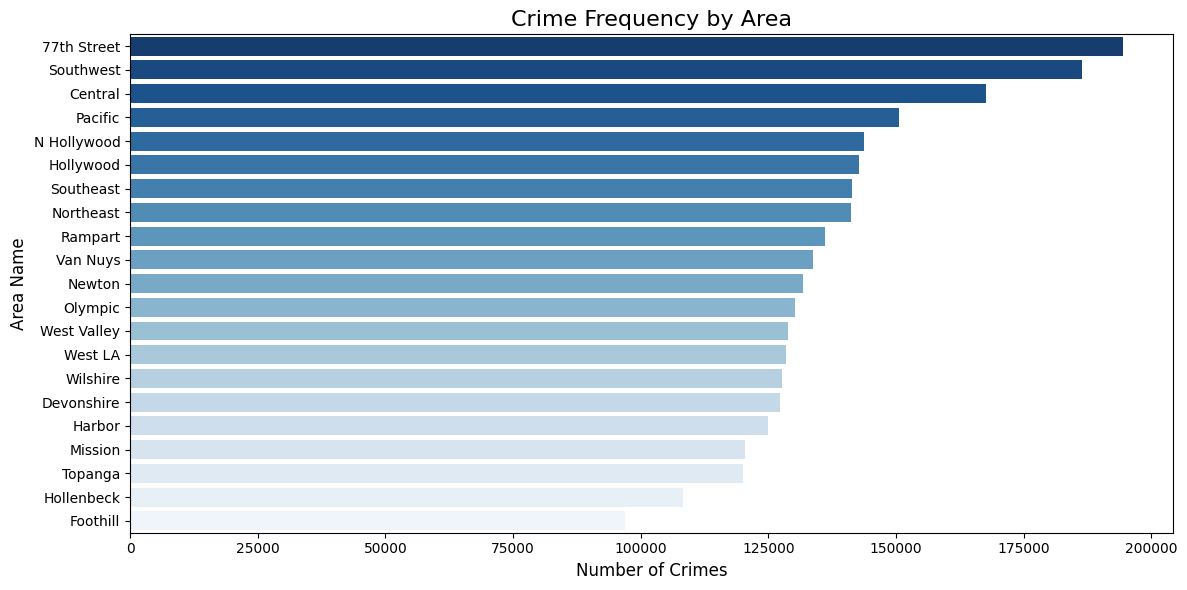

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a blue color palette
blue_palette = sns.color_palette("Blues", n_colors=len(df['area_name'].value_counts()))[::-1]

# Crime frequency by area
plt.figure(figsize=(12, 6))
sns.countplot(
    y='area_name', 
    data=df, 
    order=df['area_name'].value_counts().index, 
    palette=blue_palette
)
plt.title('Crime Frequency by Area', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=12)
plt.ylabel('Area Name', fontsize=12)
plt.tight_layout()
plt.show()


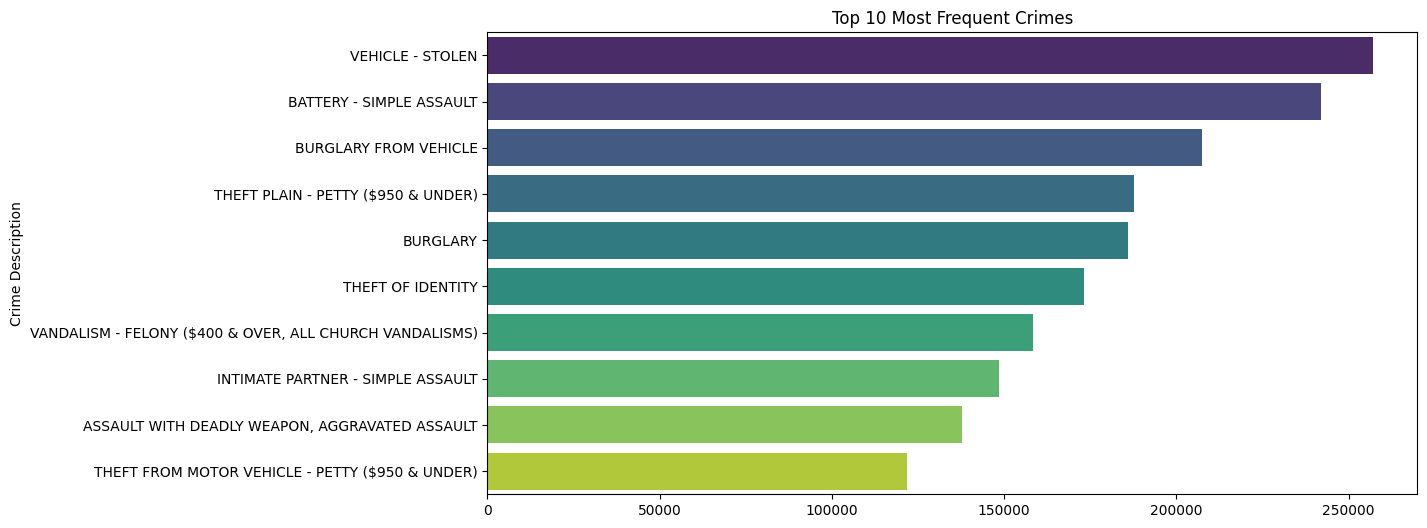

In [114]:
# Top 10 crimes
top_crimes = df['Crime Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
plt.title('Top 10 Most Frequent Crimes')
plt.show()


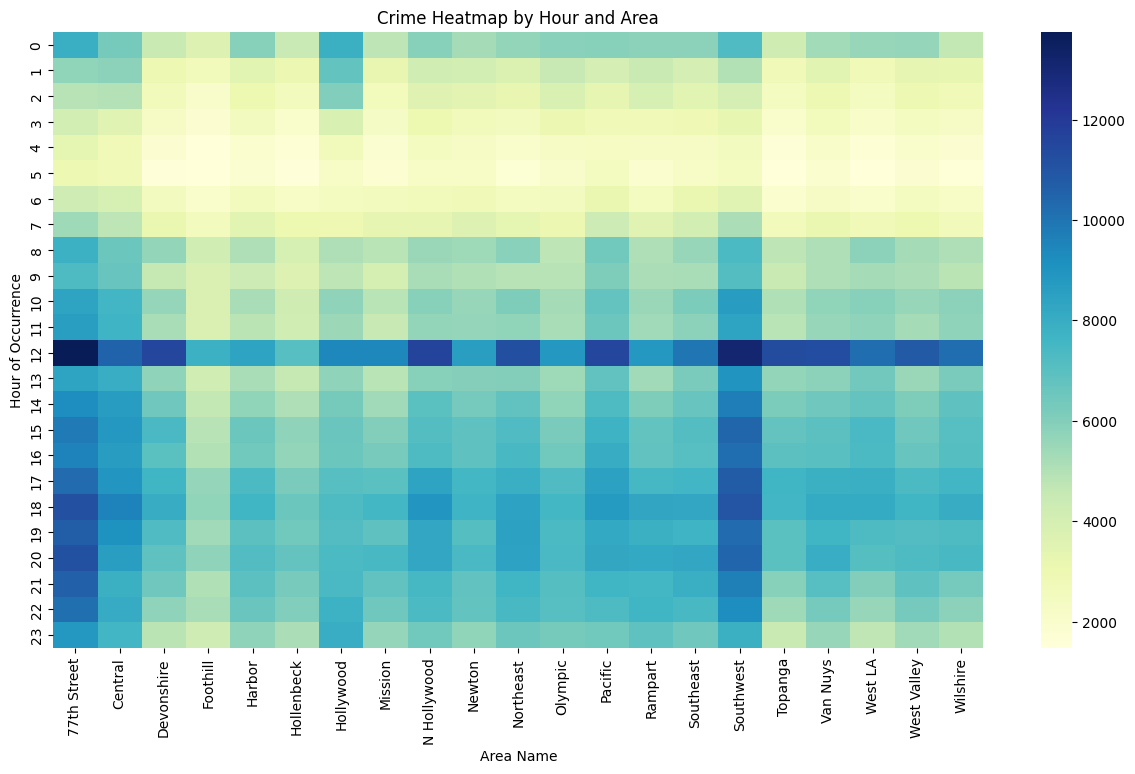

In [115]:
# Create pivot table
heatmap_data = df.pivot_table(index='hour_occ', columns='area_name', values='dr_no', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Crime Heatmap by Hour and Area")
plt.xlabel("Area Name")
plt.ylabel("Hour of Occurrence")
plt.show()


In [130]:
'''# Add day of the week
df['day_of_week'] = df['date_occ'].dt.day_name()

# Crime distribution by day
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crimes by Day of the Week')
plt.show()

# Crime distribution by hour
df['hour'] = pd.to_datetime(df['time_occ'], format='%H:%M').dt.hour
plt.figure(figsize=(10, 5))
sns.histplot(df['hour'], bins=24, kde=False)
plt.title('Crimes by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()
'''

"# Add day of the week\ndf['day_of_week'] = df['date_occ'].dt.day_name()\n\n# Crime distribution by day\nplt.figure(figsize=(10, 5))\nsns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])\nplt.title('Crimes by Day of the Week')\nplt.show()\n\n# Crime distribution by hour\ndf['hour'] = pd.to_datetime(df['time_occ'], format='%H:%M').dt.hour\nplt.figure(figsize=(10, 5))\nsns.histplot(df['hour'], bins=24, kde=False)\nplt.title('Crimes by Hour of the Day')\nplt.xlabel('Hour')\nplt.ylabel('Number of Crimes')\nplt.show()\n"

In [ ]:
import folium

# Create a map centered on Los Angeles
map_la = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add crime locations
for _, row in df.sample(500).iterrows():  # Sample for performance
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.5
    ).add_to(map_la)

# Display the map
map_la


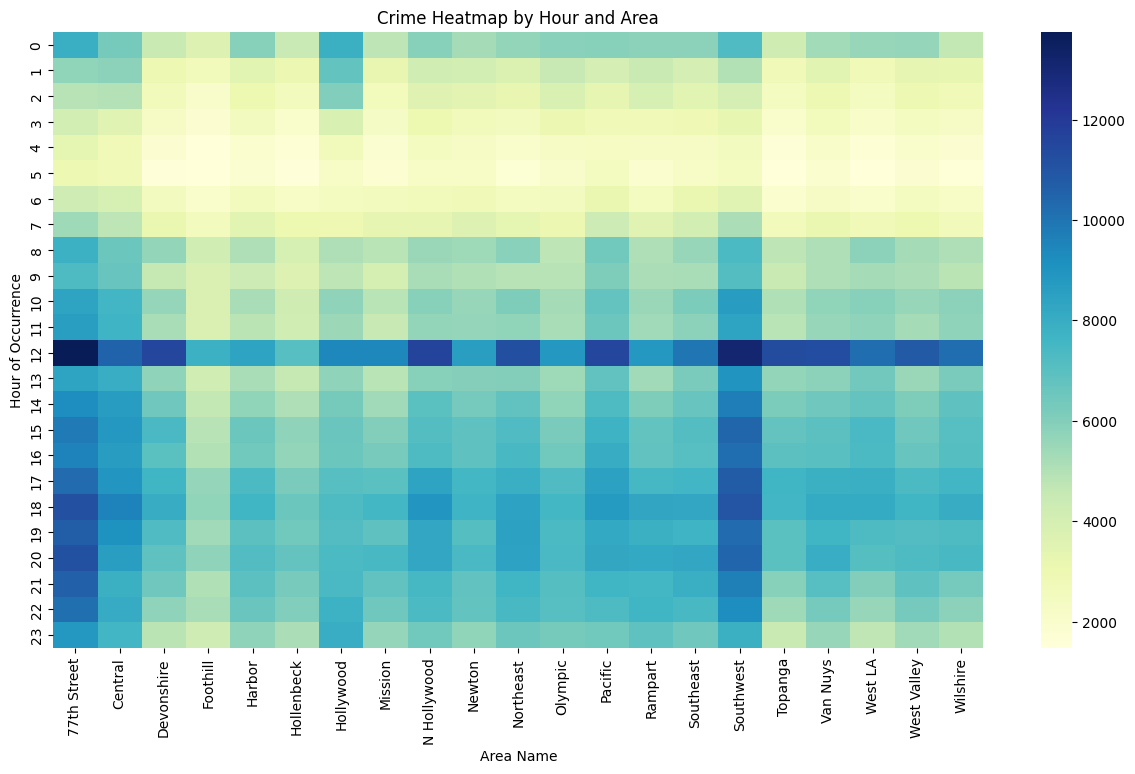

In [118]:
# Create pivot table using 'hour_occ' instead of 'hour'
heatmap_data = df.pivot_table(index='hour_occ', columns='area_name', values='dr_no', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Crime Heatmap by Hour and Area")
plt.xlabel("Area Name")
plt.ylabel("Hour of Occurrence")
plt.show()


In [128]:
# Create pivot table
heatmap_data = df.pivot_table(index='hour_occ', columns='area_name', values='dr_no', aggfunc='count', fill_value=0).reset_index()

# Convert pivot table to long format
heatmap_long = heatmap_data.melt(id_vars='hour_occ', var_name='Area', value_name='Crime Count')

# Interactive heatmap
fig = px.density_heatmap(heatmap_long, x='Area', y='hour_occ', z='Crime Count',
                         title="Crime Heatmap by Hour and Area",
                         labels={'hour_occ': 'Hour of Occurrence', 'Area': 'Area', 'Crime Count': 'Crime Count'},
                         color_continuous_scale='YlGnBu')
fig.show()


Crime Description  ABORTION/ILLEGAL  ARSON  \
area_name                                    
77th Street                     0.0  547.0   
Southwest                       1.0  348.0   

Crime Description  ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  \
area_name                                                         
77th Street                                               215.0   
Southwest                                                 166.0   

Crime Description  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  \
area_name                                                           
77th Street                                               16922.0   
Southwest                                                 10775.0   

Crime Description  ATTEMPTED ROBBERY  BATTERY - SIMPLE ASSAULT  \
area_name                                                        
77th Street                   1633.0                   17661.0   
Southwest                     1262.0                   17904.0   

Crim

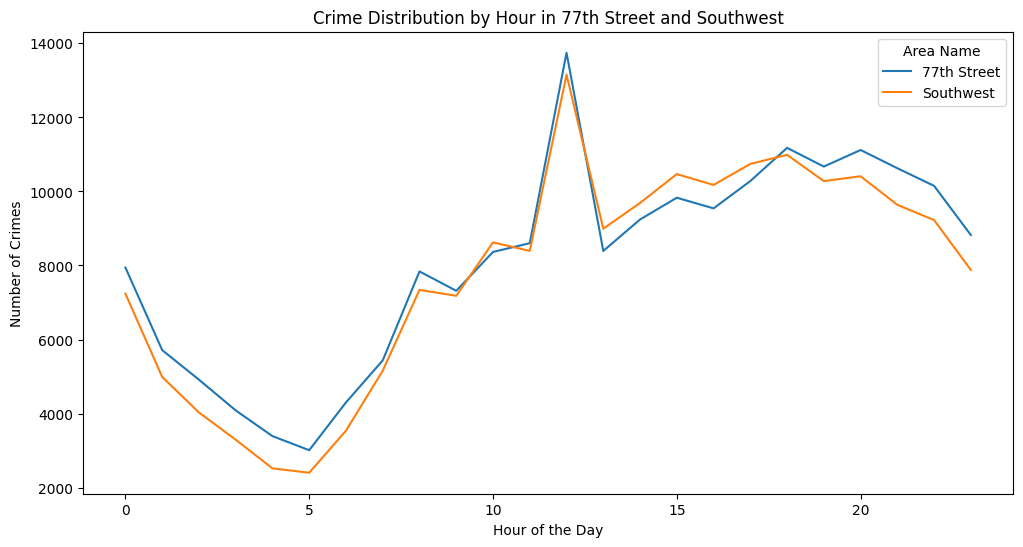

In [119]:
# Filter the DataFrame for the specific areas
high_crime_areas = df[df['area_name'].isin(['77th Street', 'Southwest'])]

# Analyze crime count by type for these areas
crime_by_type = high_crime_areas.groupby(['area_name', 'Crime Description']).size().unstack().fillna(0)
print(crime_by_type)

# Plot the crime types for these areas
'''crime_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Crime Types in 77th Street and Southwest')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.show()'''

# Analyze the crime counts per hour for these areas
crime_by_hour = high_crime_areas.groupby(['area_name', 'hour_occ']).size().unstack().fillna(0)
print(crime_by_hour)

# Plot the crime distribution by hour for these areas
crime_by_hour.T.plot(kind='line', figsize=(12, 6))
plt.title('Crime Distribution by Hour in 77th Street and Southwest')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.legend(title="Area Name", bbox_to_anchor=(1, 1))
plt.show()


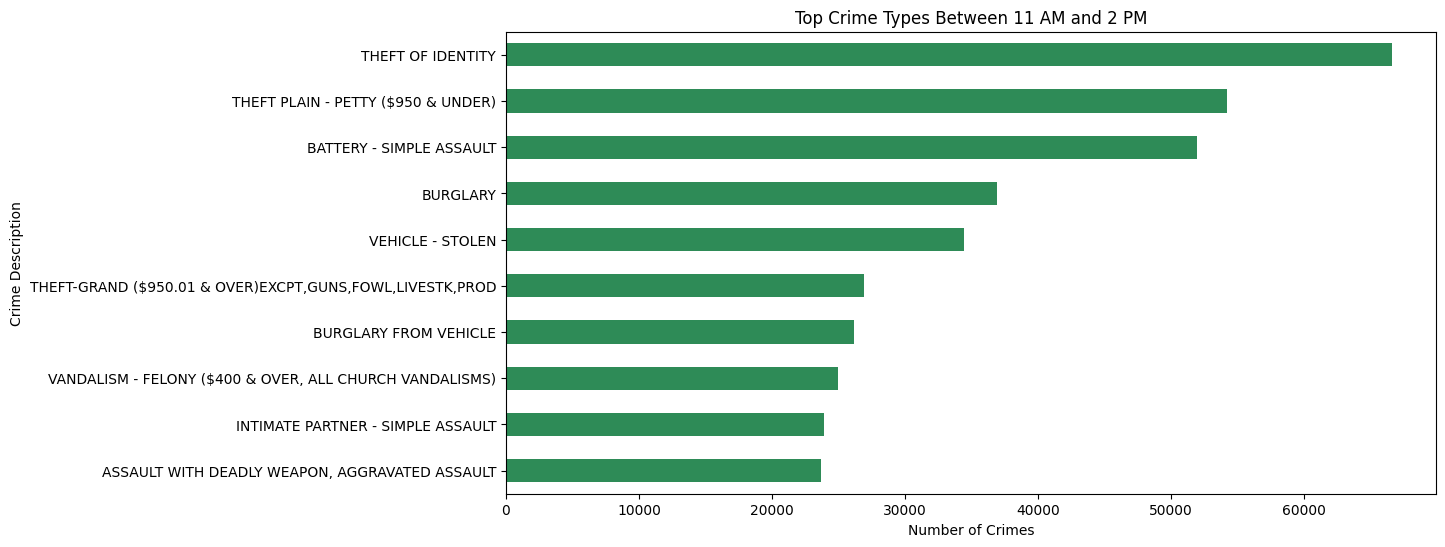

In [120]:
# Limit to the top 10 most common crime types
top_peak_crime_types = peak_crime_types.head(10)

# Plot the crime types during peak hours with horizontal bars
plt.figure(figsize=(12, 6))
top_peak_crime_types.plot(kind='barh', color='seagreen')
plt.title('Top Crime Types Between 11 AM and 2 PM')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Description')
plt.gca().invert_yaxis()  # To display the most frequent crime at the top
plt.show()


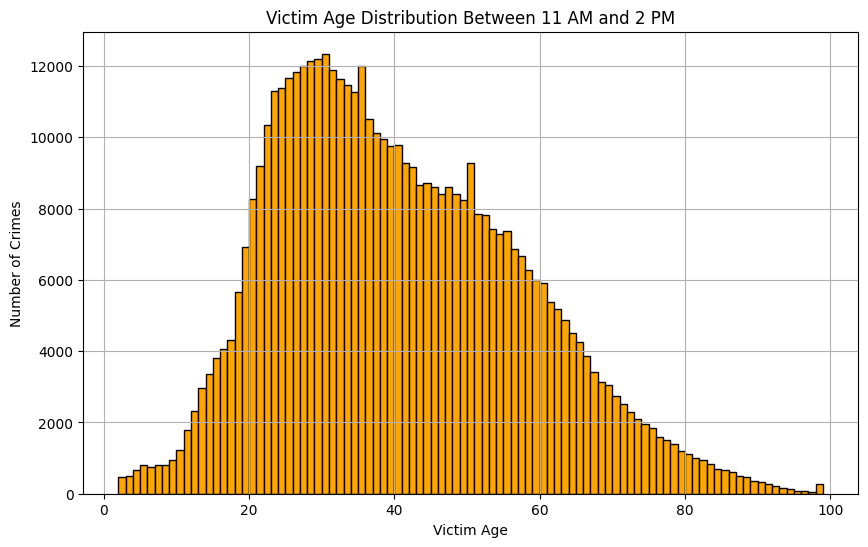

In [121]:
# Filter out rows where victim age is 0 or missing
peak_victims_filtered = peak_crime_hours[peak_crime_hours['vict_age'] > 0]

# Group by victim age and count the number of crimes
peak_victims = peak_victims_filtered.groupby('vict_age').size()

# Plot victim age distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(peak_victims.index, weights=peak_victims.values, bins=range(min(peak_victims.index), max(peak_victims.index) + 1), color='orange', edgecolor='black')
plt.title('Victim Age Distribution Between 11 AM and 2 PM')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


In [122]:
df['vict_ethnicity']

0          Hispanic/Latin/Mexican
1                           White
2          Hispanic/Latin/Mexican
3                           White
4          Hispanic/Latin/Mexican
                    ...          
2882701                      None
2882702                   Unknown
2882703                     Black
2882704                     White
2882705                      None
Name: vict_ethnicity, Length: 2882706, dtype: object

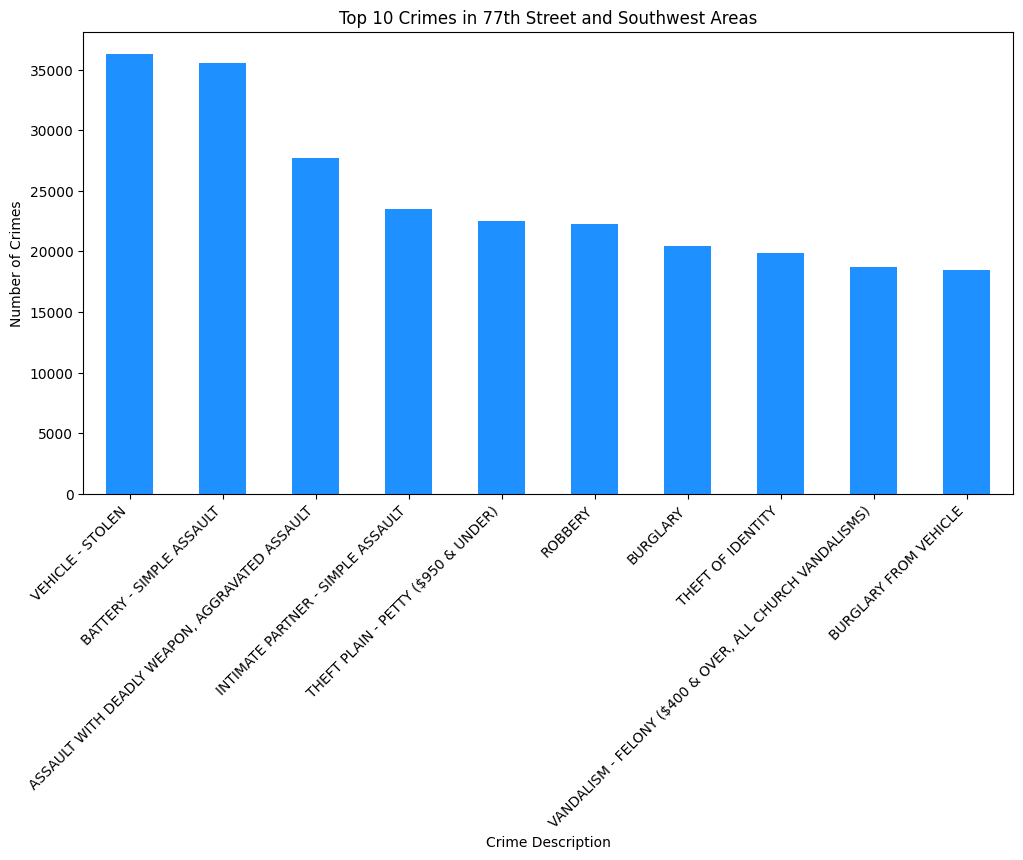

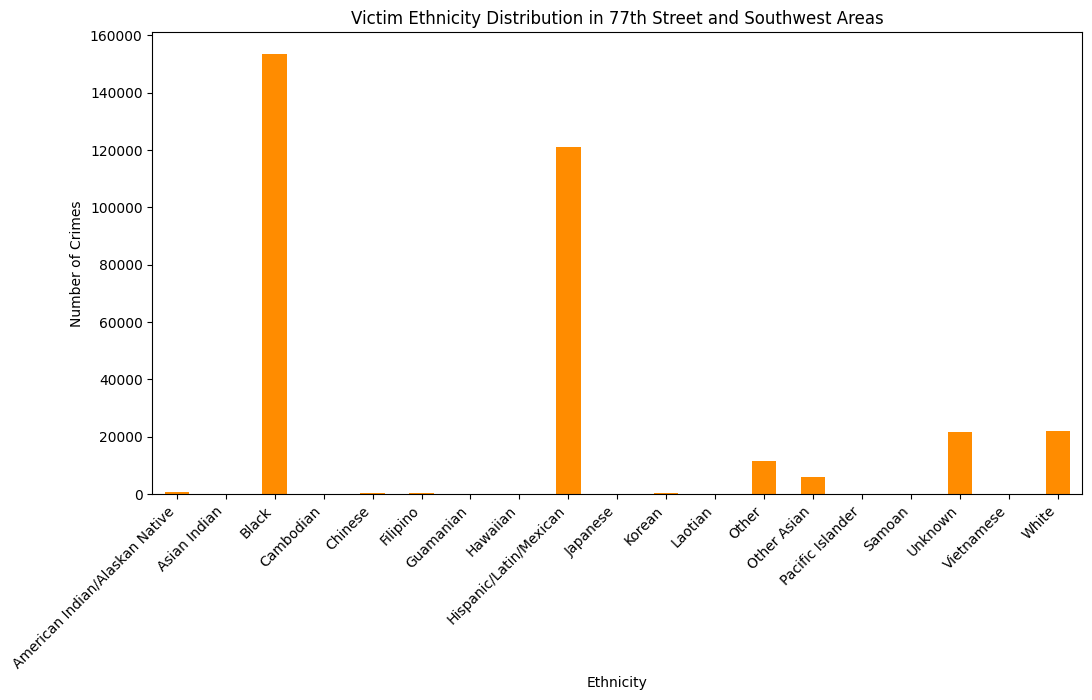

In [123]:
# Filter data for 77th Street and Southwest areas
areas_of_interest = ['77th Street', 'Southwest']
filtered_data = df[df['area_name'].isin(areas_of_interest)]

# Get top 10 crimes in these areas
top_crimes_areas = filtered_data.groupby('Crime Description').size().sort_values(ascending=False).head(10)

# Plot top 10 crimes in these areas
top_crimes_areas.plot(kind='bar', figsize=(12, 6), color='dodgerblue')
plt.title('Top 10 Crimes in 77th Street and Southwest Areas')
plt.xlabel('Crime Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Investigate the ethnicity distribution of victims in these areas
victim_ethnicity_distribution = filtered_data.groupby('vict_ethnicity').size()

# Plot victim ethnicity distribution
victim_ethnicity_distribution.plot(kind='bar', figsize=(12, 6), color='darkorange')
plt.title('Victim Ethnicity Distribution in 77th Street and Southwest Areas')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()


Total valid 'vict_ethnicity' values in the entire dataset: 2563792
Valid 'vict_ethnicity' values in 77th Street and Southwest areas: 337079
Victim Ethnicity Distribution in Entire Dataset:
vict_ethnicity
Hispanic/Latin/Mexican            937849
White                             650872
Black                             434319
Other                             258047
Unknown                           181815
Other Asian                        67401
Korean                             13314
Filipino                            7152
Chinese                             5659
Japanese                            1965
American Indian/Alaskan Native      1865
Vietnamese                          1404
Asian Indian                         715
Pacific Islander                     588
Hawaiian                             372
Guamanian                            153
Cambodian                            118
Laotian                              101
Samoan                                83
Name: count, dtyp

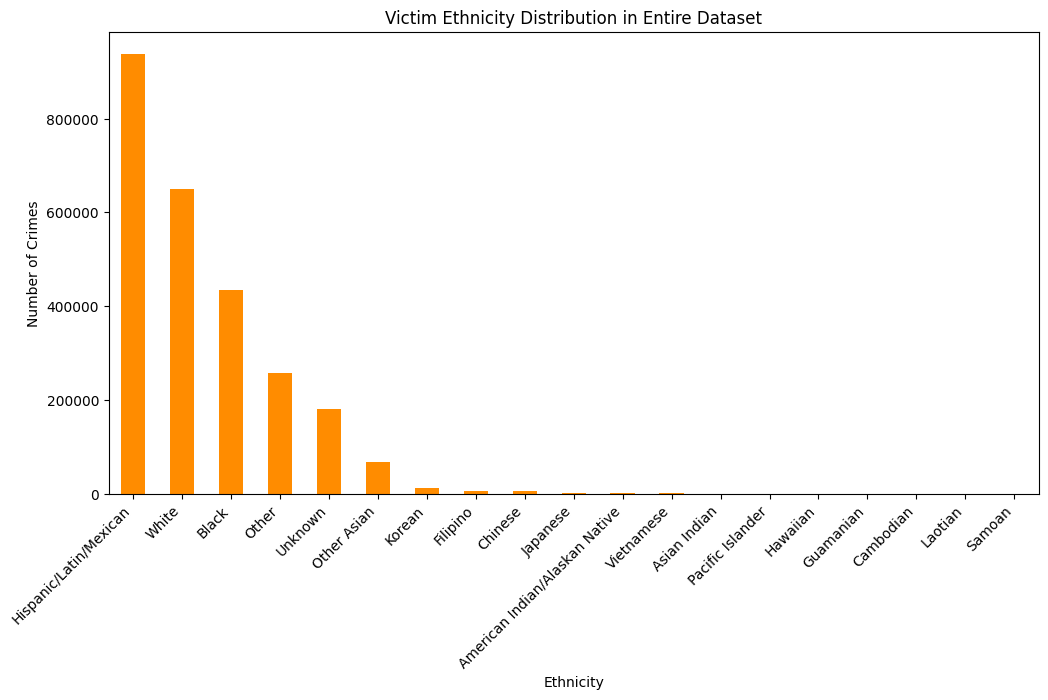

In [125]:
# Check the total number of valid values in the 'vict_ethnicity' column across the entire dataset
total_valid_ethnicity = df['vict_ethnicity'].notna().sum()
print(f"Total valid 'vict_ethnicity' values in the entire dataset: {total_valid_ethnicity}")

# Check the number of valid values for 'vict_ethnicity' in the filtered areas (77th Street and Southwest)
valid_ethnicity_in_areas = filtered_data['vict_ethnicity'].notna().sum()
print(f"Valid 'vict_ethnicity' values in 77th Street and Southwest areas: {valid_ethnicity_in_areas}")

# If there is valid data for 'vict_ethnicity', let's inspect the distribution for the entire dataset
if total_valid_ethnicity > 0:
    ethnicity_distribution = df['vict_ethnicity'].value_counts()
    print("Victim Ethnicity Distribution in Entire Dataset:")
    print(ethnicity_distribution)
    
    # Plot ethnicity distribution for the entire dataset (if data exists)
    ethnicity_distribution.plot(kind='bar', figsize=(12, 6), color='darkorange')
    plt.title('Victim Ethnicity Distribution in Entire Dataset')
    plt.xlabel('Ethnicity')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No valid data found for victim ethnicity in the entire dataset.")


In [ ]:
#a